# Phased Data Results

        Accuracy  Precision     Recall  False Positive Rate    AUC ROC  \
count  22.000000  22.000000  22.000000            22.000000  22.000000   
mean    0.950343   0.928118   0.918405             0.038395   0.984363   
std     0.019396   0.027227   0.032157             0.020441   0.006668   
min     0.909792   0.853488   0.832200             0.007504   0.969383   
25%     0.935646   0.916473   0.908220             0.023833   0.979568   
50%     0.953094   0.928830   0.924335             0.037027   0.985791   
75%     0.964050   0.943614   0.937484             0.045766   0.988703   
max     0.983699   0.971509   0.966085             0.088486   0.995935   

        R2 Score  IQS Score  
count  22.000000  22.000000  
mean    0.722302   0.882066  
std     0.098711   0.038311  
min     0.462504   0.806129  
25%     0.680927   0.851125  
50%     0.722889   0.885746  
75%     0.796864   0.912949  
max     0.850671   0.946239  


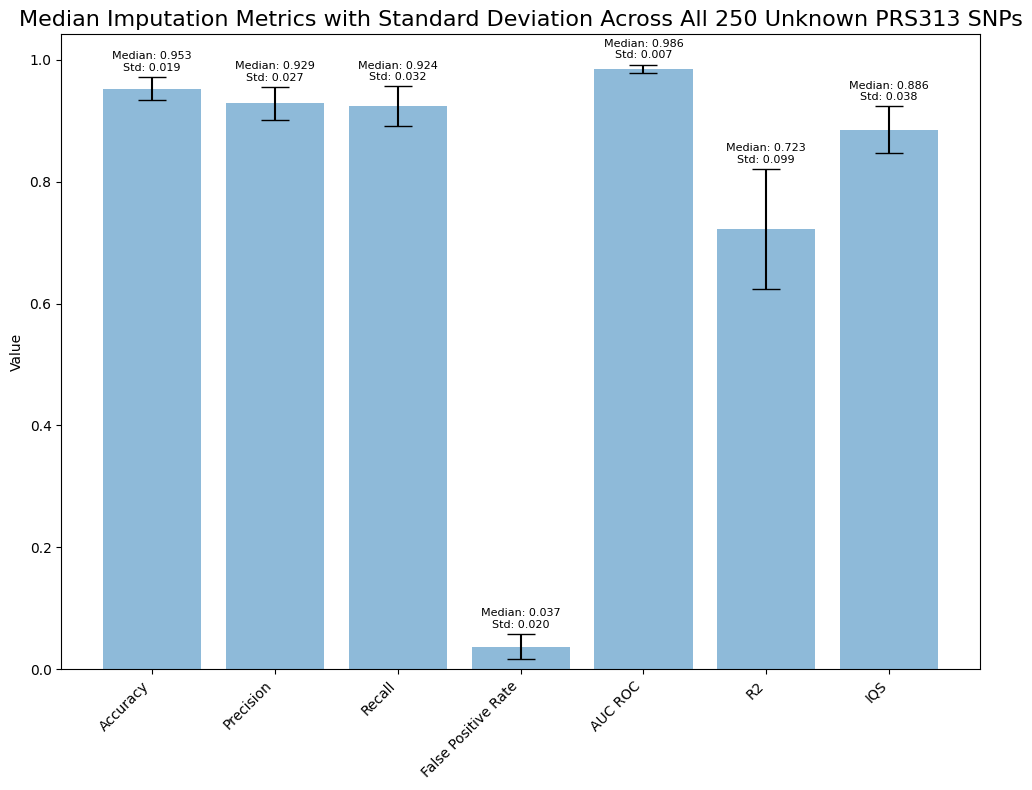

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to the folder containing the result files
folder_path = "../../Data/model_results/logistic_regression/csv_files"

# Initialize an empty list to store the dataframes
dataframes = []

# Iterate over the files in the folder again to read the modified files
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all the dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df = combined_df.dropna()

# Drop the Chromosome Column
combined_df = combined_df.drop(columns='Chromosome')

# Calculate summary statistics
summary_stats = combined_df.describe()

print(summary_stats)

# Extract the median values and standard deviations
medians = summary_stats.loc['50%'].values
std_devs = summary_stats.loc['std'].values

# Create a list of metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'False Positive Rate', 'AUC ROC', 'R2', "IQS"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot of the medians with error bars
x = range(len(metrics))
ax.bar(x, medians, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)

# Set the x-tick labels to the metric names
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')

# Set the labels and title
ax.set_ylabel('Value')
ax.set_title('Median Imputation Metrics with Standard Deviation Across All 250 Unknown PRS313 SNPs', fontsize=16)


# Display the values of median and standard deviation on the bars
for i, v in enumerate(medians):
    ax.text(i, v + std_devs[i] + 0.01, f"Median: {v:.3f}\nStd: {std_devs[i]:.3f}", ha='center', fontsize=8)

# Adjust the layout
fig.tight_layout()

# Display the plot
plt.show()

/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_66740/3477121172.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(chr_folders))


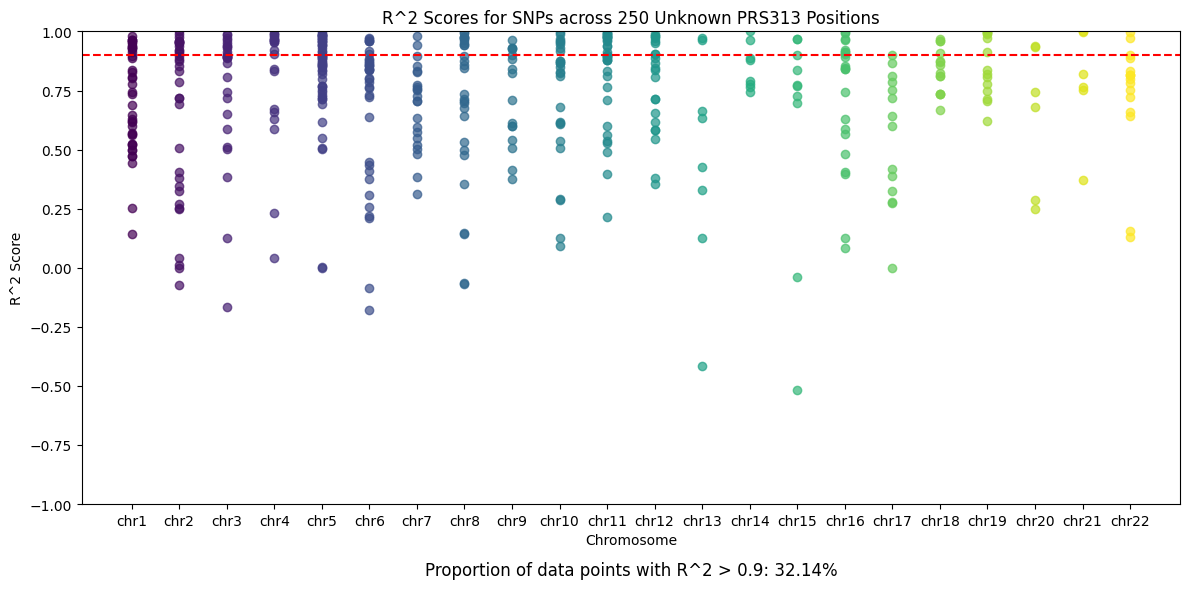

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the base directory path
base_dir = '../../Data/model_results/logistic_regression/csv_files/'

# Get the list of chromosome folders
chr_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('chr')]

# Sort the chromosome folders
chr_folders.sort(key=lambda x: int(x[3:]))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color map
cmap = plt.cm.get_cmap('viridis', len(chr_folders))

total_data_points = 0
data_points_above_threshold = 0

# Iterate over each chromosome folder
for i, chr_folder in enumerate(chr_folders):
    # Get the CSV file path
    csv_file = os.path.join(base_dir, chr_folder, 'individual_r2_scores_' + chr_folder + '.csv')
    
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Extract the chromosome and SNP position from the SNP column
    df[['chromosome', 'position']] = df['SNP'].str.split('_', n=2, expand=True)[[0, 1]]
    
    # Convert position to numeric
    df['position'] = pd.to_numeric(df['position'])
    
    # Assign x-coordinates based on the chromosome number
    df['x'] = i
    
    # Create a scatter plot for the current chromosome
    ax.scatter(df['x'], df['R2 Score'], label=chr_folder, color=cmap(i), alpha=0.7)
    
    # Calculate the number of data points above the threshold for the current chromosome
    data_points_above_threshold += (df['R2 Score'] > 0.9).sum()
    total_data_points += len(df)

# Calculate the proportion of data points above the threshold
proportion = data_points_above_threshold / total_data_points

# Add a dashed line at 0.9
ax.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5)

# Set the title and labels
ax.set_title('R^2 Scores for SNPs across 250 Unknown PRS313 Positions')
ax.set_xlabel('Chromosome')
ax.set_ylabel('R^2 Score')

# Set the x-tick labels to the chromosome numbers
ax.set_xticks(range(len(chr_folders)))
ax.set_xticklabels(chr_folders)

# Set the y-axis limits
ax.set_ylim(-1, 1)

# Add the proportion annotation at the bottom
ax.text(0.5, -0.15, f'Proportion of data points with R^2 > 0.9: {proportion:.2%}', transform=ax.transAxes, fontsize=12, ha='center')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Adjust the bottom margin to make room for the text
plt.subplots_adjust(bottom=0.15)

# Display the plot
plt.show()

# Unphased Data

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to the folder containing the result files
folder_path = "../../Data/model_results_unphased/logistic_regression/csv_files/"

# Concatenate all the dataframes into a single dataframe
combined_df = pd.read_csv(folder_path + "performance_metrics.csv")

combined_df = combined_df.dropna()

# Drop the Chromosome Column
combined_df = combined_df.drop(columns='Chromosome')

# Calculate summary statistics
summary_stats = combined_df.describe()

print(summary_stats)

# Extract the median values and standard deviations
medians = summary_stats.loc['50%'].values
std_devs = summary_stats.loc['std'].values

# Create a list of metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'False Positive Rate', 'AUC ROC', 'R2', "IQS"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot of the medians with error bars
x = range(len(metrics))
ax.bar(x, medians, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)

# Set the x-tick labels to the metric names
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')

# Set the labels and title
ax.set_ylabel('Value')
ax.set_title('Median Imputation Metrics with Standard Deviation Across All 250 Unknown PRS313 SNPs', fontsize=16)


# Display the values of median and standard deviation on the bars
for i, v in enumerate(medians):
    ax.text(i, v + std_devs[i] + 0.01, f"Median: {v:.3f}\nStd: {std_devs[i]:.3f}", ha='center', fontsize=8)

# Adjust the layout
fig.tight_layout()

# Display the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/model_results_unphased/logistic_regression/csv_files/performance_metrics.csv'

/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_66740/2417319771.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(chr_folders))


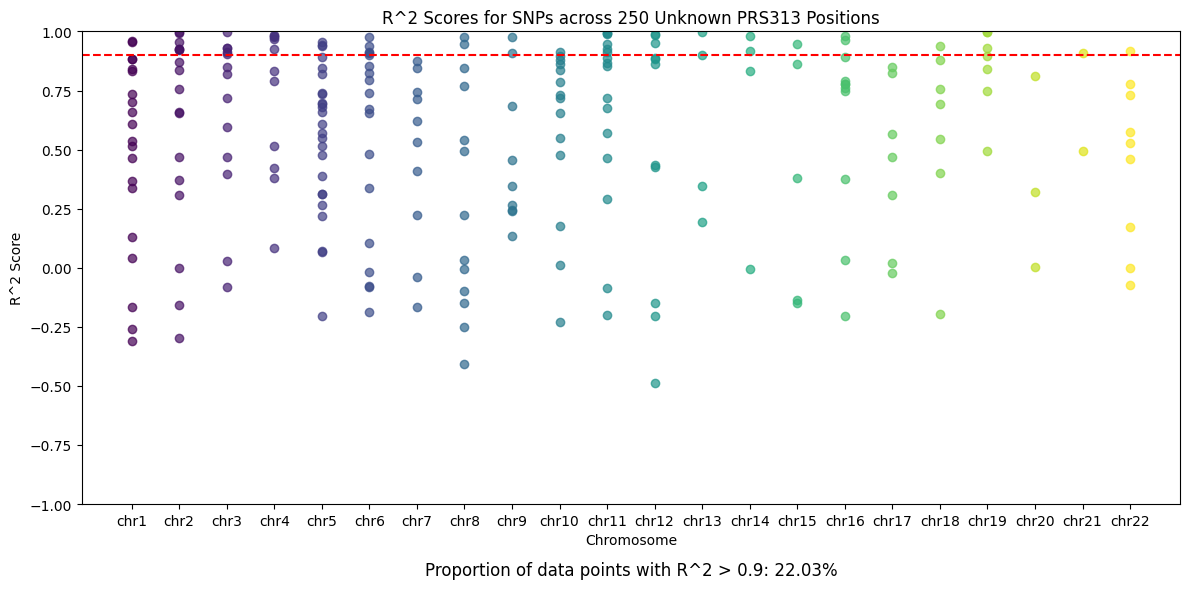

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the base directory path
base_dir = '../../Data/model_results_unphased/logistic_regression/csv_files/'

# Get the list of chromosome folders
chr_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('chr')]

# Sort the chromosome folders
chr_folders.sort(key=lambda x: int(x[3:]))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color map
cmap = plt.cm.get_cmap('viridis', len(chr_folders))

total_data_points = 0
data_points_above_threshold = 0

# Iterate over each chromosome folder
for i, chr_folder in enumerate(chr_folders):
    # Get the CSV file path
    csv_file = os.path.join(base_dir, chr_folder, 'individual_r2_scores_' + chr_folder + '.csv')
    
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Extract the chromosome and SNP position from the SNP column
    df[['chromosome', 'position']] = df['SNP'].str.split('_', n=2, expand=True)[[0, 1]]
    
    # Convert position to numeric
    df['position'] = pd.to_numeric(df['position'])
    
    # Assign x-coordinates based on the chromosome number
    df['x'] = i
    
    # Create a scatter plot for the current chromosome
    ax.scatter(df['x'], df['R2 Score'], label=chr_folder, color=cmap(i), alpha=0.7)
    
    # Calculate the number of data points above the threshold for the current chromosome
    data_points_above_threshold += (df['R2 Score'] > 0.9).sum()
    total_data_points += len(df)

# Calculate the proportion of data points above the threshold
proportion = data_points_above_threshold / total_data_points

# Add a dashed line at 0.9
ax.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5)

# Set the title and labels
ax.set_title('R^2 Scores for SNPs across 250 Unknown PRS313 Positions')
ax.set_xlabel('Chromosome')
ax.set_ylabel('R^2 Score')

# Set the x-tick labels to the chromosome numbers
ax.set_xticks(range(len(chr_folders)))
ax.set_xticklabels(chr_folders)

# Set the y-axis limits
ax.set_ylim(-1, 1)

# Add the proportion annotation at the bottom
ax.text(0.5, -0.15, f'Proportion of data points with R^2 > 0.9: {proportion:.2%}', transform=ax.transAxes, fontsize=12, ha='center')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Adjust the bottom margin to make room for the text
plt.subplots_adjust(bottom=0.15)

# Display the plot
plt.show()

# All PRS313 SNPs Unphased

       Accuracy  Precision    Recall  False Positive Rate   AUC ROC  R2 Score  \
count  2.000000   2.000000  2.000000             2.000000  2.000000  2.000000   
mean   0.881390   0.884472  0.882120             0.128721  0.951866  0.397149   
std    0.025526   0.052342  0.053324             0.010173  0.019429  0.184963   
min    0.863340   0.847460  0.844414             0.121528  0.938128  0.266360   
25%    0.872365   0.865966  0.863267             0.125125  0.944997  0.331754   
50%    0.881390   0.884472  0.882120             0.128721  0.951866  0.397149   
75%    0.890414   0.902977  0.900973             0.132318  0.958735  0.462543   
max    0.899439   0.921483  0.919826             0.135915  0.965605  0.527937   

       IQS Score  
count   2.000000  
mean    0.753271  
std     0.042601  
min     0.723147  
25%     0.738209  
50%     0.753271  
75%     0.768333  
max     0.783394  


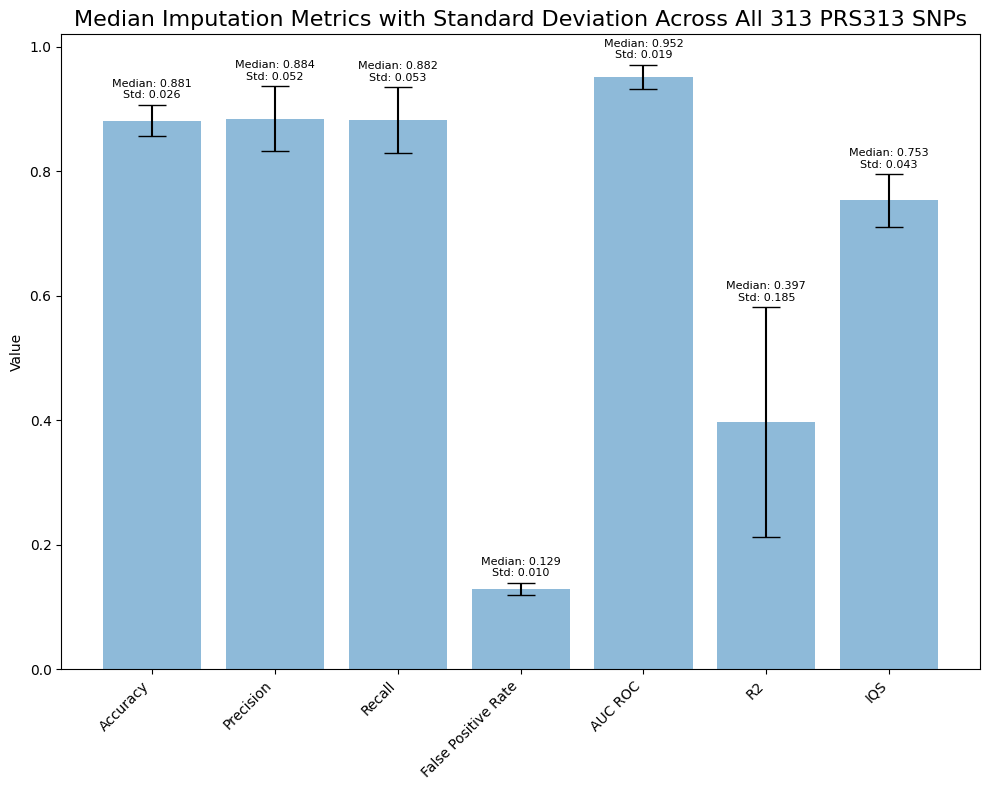

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to the folder containing the result files
folder_path = "../../Data/model_results_unphased_all_PRS/logistic_regression/csv_files/"

# Concatenate all the dataframes into a single dataframe
combined_df = pd.read_csv(folder_path + "performance_metrics.csv")

combined_df = combined_df.dropna()

# Drop the Chromosome Column
combined_df = combined_df.drop(columns='Chromosome')

# Calculate summary statistics
summary_stats = combined_df.describe()

print(summary_stats)

# Extract the median values and standard deviations
medians = summary_stats.loc['50%'].values
std_devs = summary_stats.loc['std'].values

# Create a list of metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'False Positive Rate', 'AUC ROC', 'R2', "IQS"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot of the medians with error bars
x = range(len(metrics))
ax.bar(x, medians, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)

# Set the x-tick labels to the metric names
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')

# Set the labels and title
ax.set_ylabel('Value')
ax.set_title('Median Imputation Metrics with Standard Deviation Across All 313 PRS313 SNPs', fontsize=16)

# Display the values of median and standard deviation on the bars
for i, v in enumerate(medians):
    ax.text(i, v + std_devs[i] + 0.01, f"Median: {v:.3f}\nStd: {std_devs[i]:.3f}", ha='center', fontsize=8)

# Adjust the layout
fig.tight_layout()

# Display the plot
plt.show()

/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_47403/4033810059.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(chr_folders))


30
51
67
78
112
132
146
167
181
199
218
235
240
248
255
269
278
287
294
298
302
313


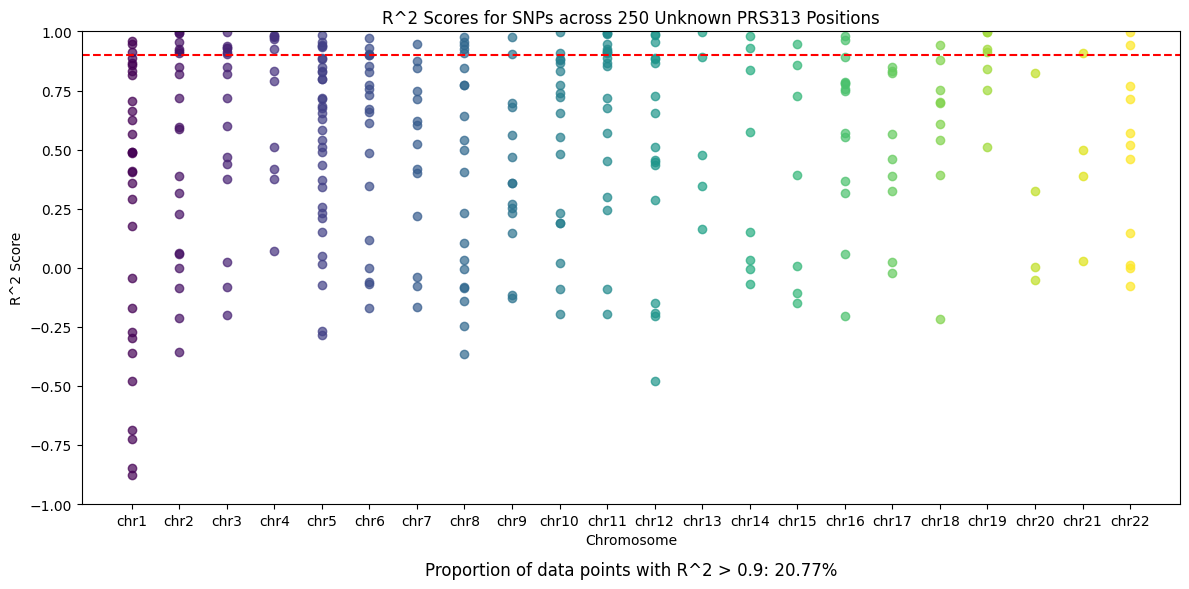

Total number of data points:  313


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the base directory path
base_dir = '../../Data/model_results_unphased_all_PRS/logistic_regression/csv_files/'

# Get the list of chromosome folders
chr_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('chr')]

# Sort the chromosome folders
chr_folders.sort(key=lambda x: int(x[3:]))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color map
cmap = plt.cm.get_cmap('viridis', len(chr_folders))

total_data_points = 0
data_points_above_threshold = 0

# Iterate over each chromosome folder
for i, chr_folder in enumerate(chr_folders):
    # Get the CSV file path
    csv_file = os.path.join(base_dir, chr_folder, 'individual_r2_scores_' + chr_folder + '.csv')
    
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Extract the chromosome and SNP position from the SNP column
    df[['chromosome', 'position']] = df['SNP'].str.split('_', n=2, expand=True)[[0, 1]]
    
    # Convert position to numeric
    df['position'] = pd.to_numeric(df['position'])
    
    # Assign x-coordinates based on the chromosome number
    df['x'] = i
    
    # Create a scatter plot for the current chromosome
    ax.scatter(df['x'], df['R2 Score'], label=chr_folder, color=cmap(i), alpha=0.7)
    
    # Calculate the number of data points above the threshold for the current chromosome
    data_points_above_threshold += (df['R2 Score'] > 0.9).sum()
    total_data_points += len(df)
    print(total_data_points)

# Calculate the proportion of data points above the threshold
proportion = data_points_above_threshold / total_data_points

# Add a dashed line at 0.9
ax.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5)

# Set the title and labels
ax.set_title('R^2 Scores for SNPs across 250 Unknown PRS313 Positions')
ax.set_xlabel('Chromosome')
ax.set_ylabel('R^2 Score')

# Set the x-tick labels to the chromosome numbers
ax.set_xticks(range(len(chr_folders)))
ax.set_xticklabels(chr_folders)

# Set the y-axis limits
ax.set_ylim(-1, 1)

# Add the proportion annotation at the bottom
ax.text(0.5, -0.15, f'Proportion of data points with R^2 > 0.9: {proportion:.2%}', transform=ax.transAxes, fontsize=12, ha='center')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Adjust the bottom margin to make room for the text
plt.subplots_adjust(bottom=0.15)

# Display the plot
plt.show()

print("Total number of data points: ", total_data_points)

/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_47403/3610222703.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(chr_folders))


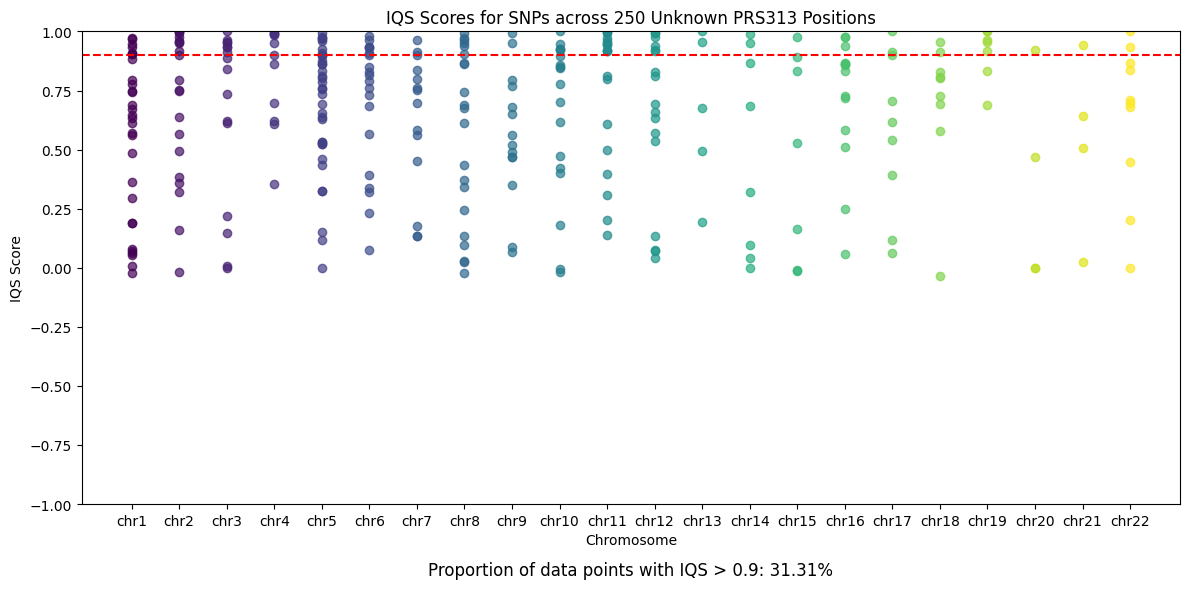

Total number of data points:  313


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the base directory path
base_dir = '../../Data/model_results_unphased_all_PRS/logistic_regression/csv_files/'

# Get the list of chromosome folders
chr_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('chr')]

# Sort the chromosome folders
chr_folders.sort(key=lambda x: int(x[3:]))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color map
cmap = plt.cm.get_cmap('viridis', len(chr_folders))

total_data_points = 0
data_points_above_threshold = 0

# Iterate over each chromosome folder
for i, chr_folder in enumerate(chr_folders):
    # Get the CSV file path
    csv_file = os.path.join(base_dir, chr_folder, 'individual_iqs_scores_' + chr_folder + '.csv')
    
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Extract the chromosome and SNP position from the SNP column
    df[['chromosome', 'position']] = df['SNP'].str.split('_', n=2, expand=True)[[0, 1]]
    
    # Convert position to numeric
    df['position'] = pd.to_numeric(df['position'])
    
    # Assign x-coordinates based on the chromosome number
    df['x'] = i
    
    # Create a scatter plot for the current chromosome
    ax.scatter(df['x'], df['IQS Score'], label=chr_folder, color=cmap(i), alpha=0.7)
    
    # Calculate the number of data points above the threshold for the current chromosome
    data_points_above_threshold += (df['IQS Score'] > 0.9).sum()
    total_data_points += len(df)

# Calculate the proportion of data points above the threshold
proportion = data_points_above_threshold / total_data_points

# Add a dashed line at 0.9
ax.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5)

# Set the title and labels
ax.set_title('IQS Scores for SNPs across 250 Unknown PRS313 Positions')
ax.set_xlabel('Chromosome')
ax.set_ylabel('IQS Score')

# Set the x-tick labels to the chromosome numbers
ax.set_xticks(range(len(chr_folders)))
ax.set_xticklabels(chr_folders)

# Set the y-axis limits
ax.set_ylim(-1, 1)

# Add the proportion annotation at the bottom
ax.text(0.5, -0.15, f'Proportion of data points with IQS > 0.9: {proportion:.2%}', transform=ax.transAxes, fontsize=12, ha='center')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Adjust the bottom margin to make room for the text
plt.subplots_adjust(bottom=0.15)

# Display the plot
plt.show()

print("Total number of data points: ", total_data_points)